In [1]:
pwd

'/content'

# 영상 더하기

- 결과의 밝기 범위가 0~255 사이에 유지되려면 cv.add를 사용

  lena = cv.imread("lena512.tif")

  dst = cv.add(img, lena) 또는 dst = cv.add(img, 100)

- 두 영상의 가중치 합

  dst = cv.addWeighted(img, 0.5, lena, 0.5, 0)

# 2D convolution

- Filter의 계수를 지정하여 2D convolution을 수행할 수 있음
- 5x5 box filtering

  kernel = np.ones((5,5), np.float32)/25

  dst = cv.filter2D(img, -1, kernel)

- Gaussian filtering

  sigma = 3

  w = 6*sigma+1

  blur = cv.GaussianBlur(img, (w,w), sigma)

  - Median filtering
    blur = cv.medianBlur(img, 5)


# Sobel 에지 검출

- Sobel 방식
  
  x와 y 방향으로 1차 미분값을 구함. 미분값이 큰 부분이 에지에 해당

- Sobel 함수

  dst = cv.Sobel(src, depth, dx, dy[, ksize[, scale[, delta[, borderType]]]])

  sobelx8u = cv.Sobel(img, cv.CV_8U, 1, 0, ksize=5)

  sobelx64f = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)

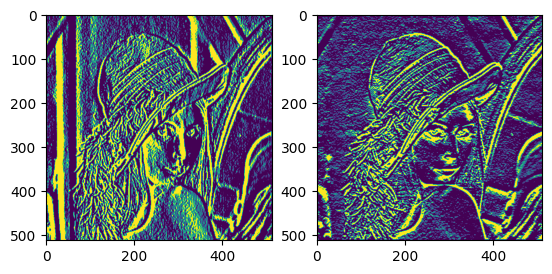

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena512.tif")

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

x_edges = cv.Sobel(gray, -1, 1, 0, ksize=5)
y_edges = cv.Sobel(gray, -1, 0, 1, ksize=5)

plt.subplot(1,2,1)
plt.imshow(x_edges)
plt.subplot(1,2,2)
plt.imshow(y_edges)

# Canny 에지 검출
- 검출 방식

  - Gaussian 함수로 영상을 평활화
  - 결과 영상에 대해 1차 미분값을 이용하여 에지 강도를 계산
  - 비최대 억제를 이용하여 얇은 에지 맵을 추출
  - 이력 임계값을 적용

- 비최대 억제
  - 이웃 두 화소보다 에지 강도가 크지 않으면 억제됨

- 이력 임계값
  - 두 개의 임계값 Thigh와 Tlow 사용하여 거짓 긍정 줄임
  - 에지 추적은 Thigh를 넘는 화소에서 시작, 추적 도중에는 Tlow 적용

# Canny 에지 함수
- Canny 함수

  edges = cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])

- Canny 함수에서 smoothing을 조절하려면 Gaussian convollution을 먼저 수행하고 Canny 함수를 호출해야 함

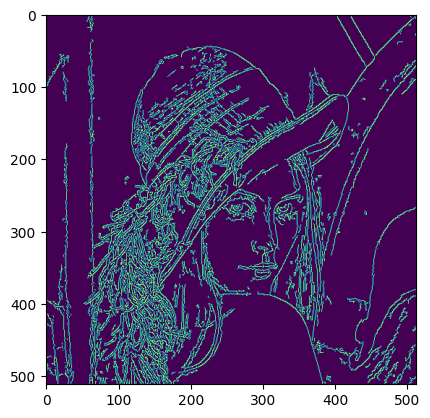

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("lena512.tif")

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray, 50, 100, 3)

plt.imshow(edges)
plt.show()

# OpenCV 함수들
- kernel = cv.getStructuringElement(shape, ksize, anchor)

  shape: 형태를 지정
  ksize: 구조 요소의 크기를 지정
  anchor: 구조 요소의 원점 위치

- erosion = cv.erode(img, kernel, iterations=1)
- dilation = cv.dilate(img, kernel, iterations=1)
- opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
- closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

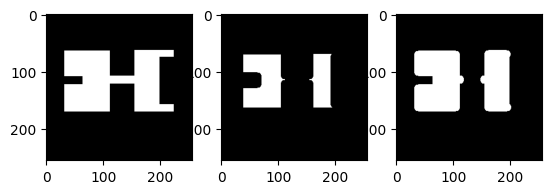

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread("pattern.png")
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15))
dilation = cv.erode(gray, kernel, iterations=1)
closing = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)

plt.subplot(1,3,1)
plt.imshow(gray)
plt.subplot(1,3,2)
plt.imshow(dilation)
plt.subplot(1,3,3)
plt.imshow(closing)
plt.show()

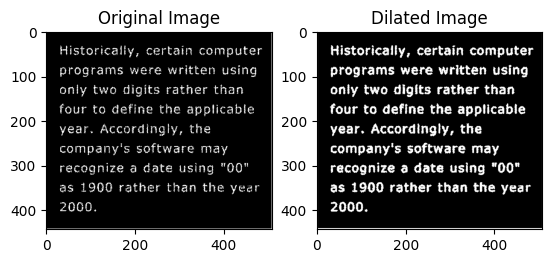

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread("0907.png", cv.IMREAD_GRAYSCALE)  # 이미지를 그레이스케일로 읽음
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))  # 3x3 크기의 교차형 구조 요소 생성
dilation = cv.dilate(gray, kernel, iterations=1)  # dilation 수행

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(dilation, cmap='gray')
plt.title('Dilated Image')
plt.show()


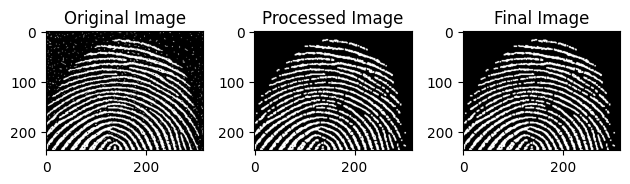

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

gray = cv.imread("0911.png")

# 3x3 square로 구조 요소 생성
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

# 초기 이미지 출력
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')

# Erosion, Dilation, Dilation, Erosion 반복
for i in range(4):
    # Erosion
    gray = cv.erode(gray, kernel, iterations=1)

    # Dilation
    gray = cv.dilate(gray, kernel, iterations=1)

# 결과 이미지 출력
plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')

# 초기 이미지와 마지막 이미지 비교를 위한 Erosion 수행
get_array_wrap = cv.erode(gray, kernel, iterations=1)

plt.subplot(1, 3, 3)
plt.imshow(gray, cmap='gray')
plt.title('Final Image')

plt.tight_layout()
plt.show()

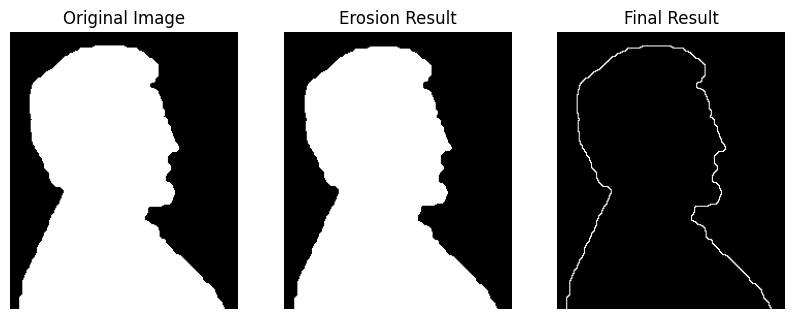

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original_image = cv.imread('0914.png', cv.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

# Erosion 수행
erosion_result = cv.erode(original_image, kernel, iterations=1)

# 경계 추출
boundary_extraction_result = original_image - erosion_result

# 결과를 화면에 표시
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion_result, cmap='gray')
plt.title('Erosion Result')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(boundary_extraction_result, cmap='gray')
plt.title('Final Result')
plt.axis('off')

plt.show()
